Observations:




+ Most of the consumer credit complaints come from the most populated states (CA, TX)
    - Florida is an exception; the high number of credit complaints from FL could be result of fraud or misunderstandings among an elderly population

+ Upon first review of data, I was going to limit the analysis to the 8 states from which the most complaints come, and the top 5 institutions with complaints. But I'm not going to cut the data this way. I will include everything.

+ Initially, I planned to build the model using the 'Product' data. But the 'Product' data is too vague. I've decided to use 'Issue' data.

+ Create dummy variables for the columns of data I'm modeling.

+ Group 'Date received' by month and year

+ Change 'Customer disputed?' to binary

+ Change 'Company response to consumer' to dummy variable

Questions for Wednesday class:

- Should I drop all the columns of data I'm not going to use, e.g. zip code, tags, Consumer complaint narrative?
- Do I need to remove NA and NaN fields?
- Need reminder of what I need to change covariates to in order to work in statsmodels...all data currently in Series format (vs dataframe).

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline


In [103]:
df = pd.read_csv('Consumer_Complaints1.csv')

In [104]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679879 entries, 0 to 679878
Data columns (total 18 columns):
Date received                   679879 non-null object
Product                         679879 non-null object
Sub-product                     478762 non-null object
Issue                           679878 non-null object
Sub-issue                       274342 non-null object
Consumer complaint narrative    118315 non-null object
Company public response         150445 non-null object
Company                         679879 non-null object
State                           674511 non-null object
ZIP code                        674498 non-null object
Tags                            96164 non-null object
Consumer consent provided?      215359 non-null object
Submitted via                   679878 non-null object
Date sent to company            679879 non-null object
Company response to consumer    679879 non-null object
Timely response?                679879 non-null object
Consumer d

In [106]:
df.size

12237822

In [107]:
df.shape

(679879, 18)

In [108]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [109]:
for x in df.columns.values:
    print x

Date received
Product
Sub-product
Issue
Sub-issue
Consumer complaint narrative
Company public response
Company
State
ZIP code
Tags
Consumer consent provided?
Submitted via
Date sent to company
Company response to consumer
Timely response?
Consumer disputed?
Complaint ID


In [110]:
len(df)

679879

In [111]:
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                     201117
Issue                                1
Sub-issue                       405537
Consumer complaint narrative    561564
Company public response         529434
Company                              0
State                             5368
ZIP code                          5381
Tags                            583715
Consumer consent provided?      464520
Submitted via                        1
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?               40594
Complaint ID                         0
dtype: int64

In [112]:
df['Company'].value_counts()

Bank of America                              62164
Wells Fargo & Company                        49489
Equifax                                      42362
Experian                                     40094
JPMorgan Chase & Co.                         39365
TransUnion Intermediate Holdings, Inc.       34354
Citibank                                     31652
Ocwen                                        23070
Capital One                                  18329
Nationstar Mortgage                          15125
Synchrony Financial                          11508
U.S. Bancorp                                 11252
Ditech Financial LLC                         10624
Navient Solutions, Inc.                      10413
PNC Bank N.A.                                 8004
Amex                                          7366
Encore Capital Group                          7189
HSBC North America Holdings Inc.              6854
Discover                                      5747
SunTrust Banks, Inc.           

In [113]:
df['Company response to consumer'].value_counts()

Closed with explanation            501845
Closed with non-monetary relief     85587
Closed with monetary relief         45861
Closed without relief               17863
Closed                              15688
Closed with relief                   5298
In progress                          3973
Untimely response                    3764
Name: Company response to consumer, dtype: int64

In [114]:
df['State'].value_counts().head(10)

CA    99006
FL    65497
TX    51656
NY    46939
GA    31050
NJ    27278
IL    24570
PA    24448
VA    22013
MD    21459
Name: State, dtype: int64

In [115]:
df['Tags'].value_counts()
# Recommend ignoring 'Tags' column due to minimal data and don't see relevance for predictive model

Older American                   55639
Servicemember                    32729
Older American, Servicemember     7796
Name: Tags, dtype: int64

In [116]:
df['Product'].value_counts()

Mortgage                   212178
Debt collection            126369
Credit reporting           120998
Credit card                 80119
Bank account or service     77253
Consumer Loan               27101
Student loan                22083
Payday loan                  4893
Money transfers              4792
Prepaid card                 3242
Other financial service       836
Virtual currency               15
Name: Product, dtype: int64

In [117]:
df['Sub-product'].value_counts()

Other mortgage                            82264
Conventional fixed mortgage               65690
Checking account                          53724
Other (i.e. phone, health club, etc.)     37853
I do not know                             26429
Credit card                               25464
Conventional adjustable mortgage (ARM)    23806
FHA mortgage                              22582
Non-federal student loan                  20938
Medical                                   17504
Vehicle loan                              15386
Other bank product/service                15016
Payday loan                               11721
Home equity loan or line of credit        10674
Installment loan                           7241
Savings account                            4750
VA mortgage                                4608
Mortgage                                   4359
Federal student loan servicing             3716
Auto                                       3193
(CD) Certificate of deposit             

In [118]:
df['Issue'].value_counts()

Loan modification,collection,foreclosure    107093
Incorrect information on credit report       88243
Loan servicing, payments, escrow account     70979
Cont'd attempts collect debt not owed        52502
Account opening, closing, or management      33832
Disclosure verification of debt              25173
Communication tactics                        21621
Deposits and withdrawals                     20618
Application, originator, mortgage broker     15702
Credit reporting company's investigation     14178
Billing disputes                             13374
Other                                        13262
Managing the loan or lease                   12973
Problems caused by my funds being low        10785
Dealing with my lender or servicer           10546
False statements or representation           10174
Unable to get credit report/credit score      9870
Improper contact or sharing of info           8938
Problems when you are unable to pay           8281
Settlement process and costs   

In [119]:
df['Sub-issue'].value_counts()

Account status                              32990
Debt is not mine                            31966
Information is not mine                     27172
Not given enough info to verify debt        17598
Debt was paid                               14395
Frequent or repeated calls                  13250
Account terms                                9560
Attempted to collect wrong amount            7776
Public record                                7441
Personal information                         6409
Right to dispute notice not received         6033
Problem getting my free annual report        5924
No notice of investigation status/result     5377
Problem with statement of dispute            5151
Reinserted previously deleted info           4671
Report improperly shared by CRC              4493
Talked to a third party about my debt        4379
Threatened to take legal action              4227
Debt resulted from identity theft            4007
Problem getting report or credit score       3946


In [120]:
df['Consumer complaint narrative'].value_counts(3)

I am filing this complaint because Experian has ignored my request to provide me with the documents that their company has on file that was used to verify the accounts I disputed. Being that they have gone past the 30 day mark and can not verify these accounts, under Section 611 ( 5 ) ( A ) of the FCRA - they are required to " ... promptly delete all information which can not be verified '' that I have disputed. Please resolve this manner as soon as possible. Thank you.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [121]:
df['Consumer consent provided?'].value_counts(100)

Consent provided        0.549385
Consent not provided    0.417819
Other                   0.032769
Consent withdrawn       0.000028
Name: Consumer consent provided?, dtype: float64

In [122]:
df['Submitted via'].value_counts()

Web            453125
Referral       124219
Phone           47939
Postal mail     44396
Fax              9851
Email             348
Name: Submitted via, dtype: int64

In [123]:
df['Company response to consumer'].value_counts()

Closed with explanation            501845
Closed with non-monetary relief     85587
Closed with monetary relief         45861
Closed without relief               17863
Closed                              15688
Closed with relief                   5298
In progress                          3973
Untimely response                    3764
Name: Company response to consumer, dtype: int64

In [124]:
df['Timely response?'].value_counts()
# only 3% indicated "No"

Yes    661618
No      18261
Name: Timely response?, dtype: int64

In [125]:
df['Consumer disputed?'].value_counts()
# No=79%, Yes=21%

No     504944
Yes    134341
Name: Consumer disputed?, dtype: int64

In [126]:
import pylab as pl
import statsmodels.api as sm

In [127]:
df1 = df.groupby('Consumer disputed?')['Company']
print df1.value_counts()

Consumer disputed?  Company                                       
No                  Bank of America                                   46249
                    Wells Fargo & Company                             35676
                    Experian                                          31920
                    Equifax                                           30761
                    JPMorgan Chase & Co.                              29071
                    TransUnion Intermediate Holdings, Inc.            26152
                    Citibank                                          23960
                    Ocwen                                             16912
                    Capital One                                       14178
                    Nationstar Mortgage                               11027
                    Synchrony Financial                                9268
                    U.S. Bancorp                                       8365
                    N

In [128]:
df2 = df.groupby('Consumer disputed?')['State']
df3 = df2.value_counts().head(10)

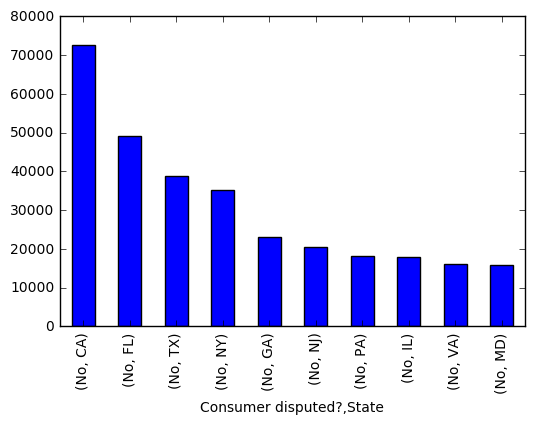

In [129]:
df3.plot.bar()

In [130]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
dispute_yes['Issue'].value_counts().head(10)

Loan modification,collection,foreclosure    23841
Loan servicing, payments, escrow account    16662
Incorrect information on credit report      12669
Cont'd attempts collect debt not owed        9177
Account opening, closing, or management      6800
Disclosure verification of debt              5442
Application, originator, mortgage broker     4112
Deposits and withdrawals                     3879
Credit reporting company's investigation     3582
Billing disputes                             2930
Name: Issue, dtype: int64

In [131]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
df10 = dispute_yes['Company response to consumer'].value_counts()
df10

Closed with explanation            110192
Closed with non-monetary relief     10325
Closed with monetary relief          4962
Closed without relief                4813
Closed                               3338
Closed with relief                    709
Untimely response                       2
Name: Company response to consumer, dtype: int64

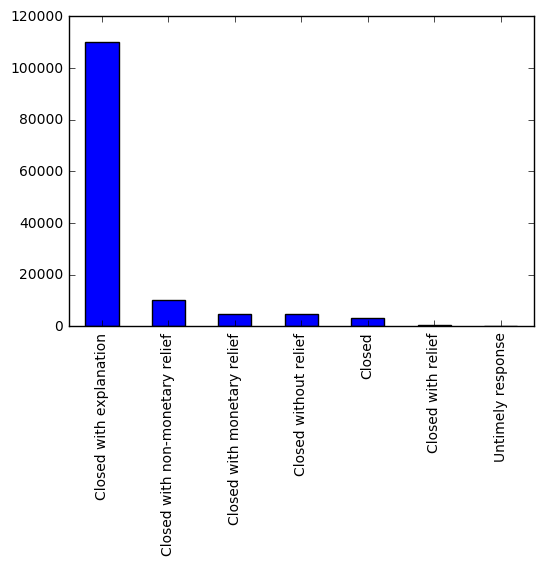

In [132]:
df10.plot.bar()

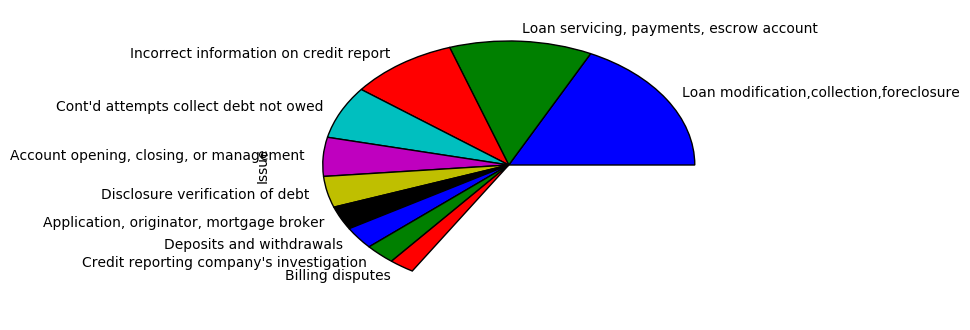

In [133]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
dis_issue = dispute_yes['Issue'].value_counts(100).head(10)
dis_issue.plot.pie()

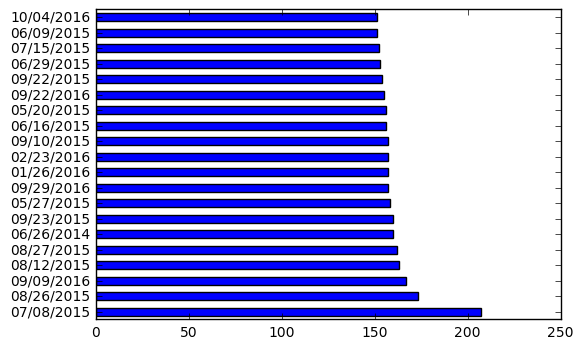

In [134]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
dis_date = dispute_yes['Date received'].value_counts().head(20)
dis_date.plot.barh()

In [135]:
disp_no = (df['Consumer disputed?'] == 'No')
dispute_no = df[disp_no]
dispute_no['Issue'].value_counts(100).head(10)

Loan modification,collection,foreclosure    0.157699
Incorrect information on credit report      0.134170
Loan servicing, payments, escrow account    0.101101
Cont'd attempts collect debt not owed       0.078314
Account opening, closing, or management     0.049681
Communication tactics                       0.034380
Disclosure verification of debt             0.034303
Deposits and withdrawals                    0.031158
Application, originator, mortgage broker    0.021165
Other                                       0.020416
Name: Issue, dtype: float64

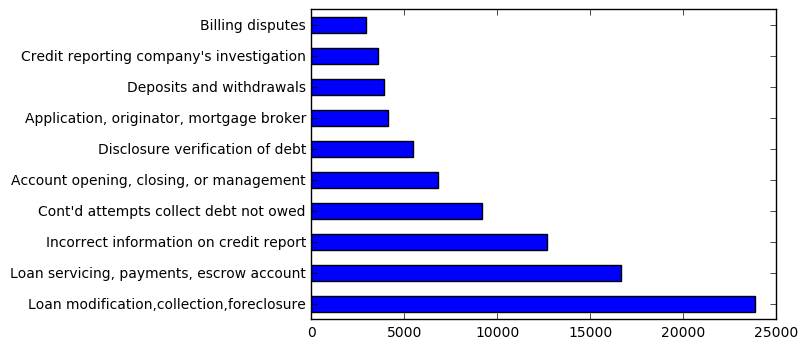

In [136]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
dfdisputeyes = dispute_yes['Issue'].value_counts().head(10)
dfdisputeyes.plot.barh()

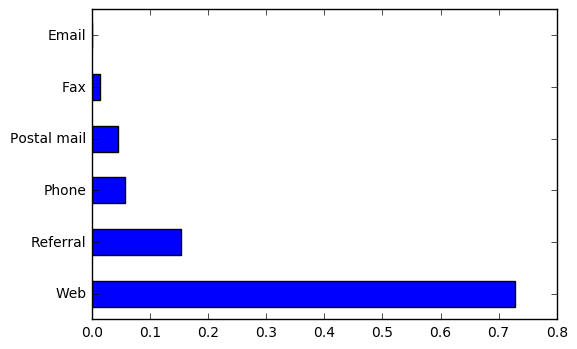

In [137]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
df4 = dispute_yes['Submitted via'].value_counts(100)
df4.plot.barh()

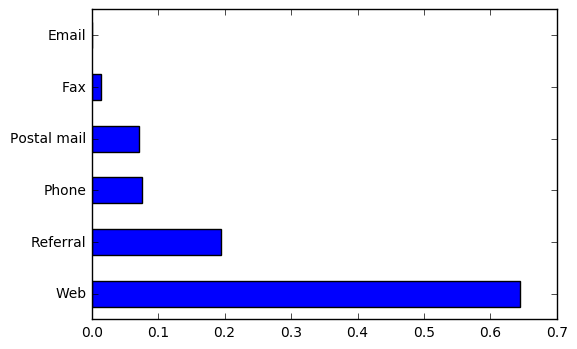

In [138]:
disp_no = (df['Consumer disputed?'] == 'No')
dispute_no = df[disp_no]
df5 = dispute_no['Submitted via'].value_counts(100)
df5.plot.barh()

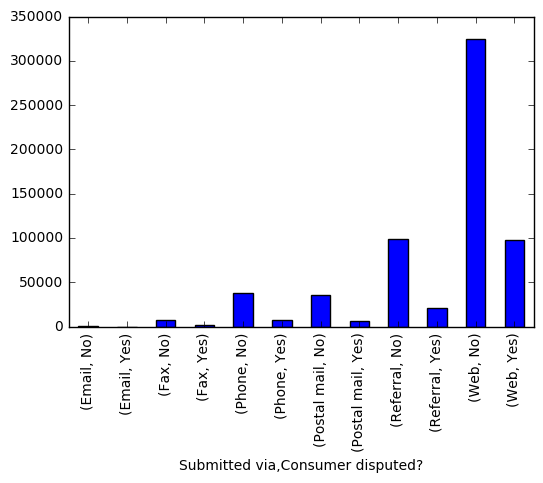

In [139]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
#dispute_yes = df[disputeyes]
disp_no = (df['Consumer disputed?'] == 'No')
#dispute_no = df[disp_no]
#submit = (df['Submitted via'])
#dfcombo = (df[disputeyes], df[disp_no], df[submit])

dfdisp = df.groupby('Submitted via')['Consumer disputed?'].value_counts()
dfdisp.plot.bar()
#df3 = df2.value_counts().head(10)

In [140]:
df['State'].value_counts().head(10)

CA    99006
FL    65497
TX    51656
NY    46939
GA    31050
NJ    27278
IL    24570
PA    24448
VA    22013
MD    21459
Name: State, dtype: int64

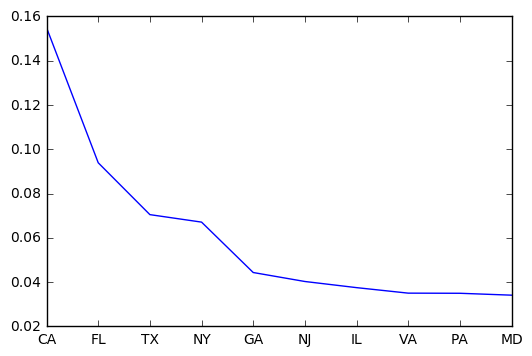

In [141]:
disputeyes = (df['Consumer disputed?'] == 'Yes')
dispute_yes = df[disputeyes]
df5 = dispute_yes['State'].value_counts(100).head(10)
df5.plot.line()

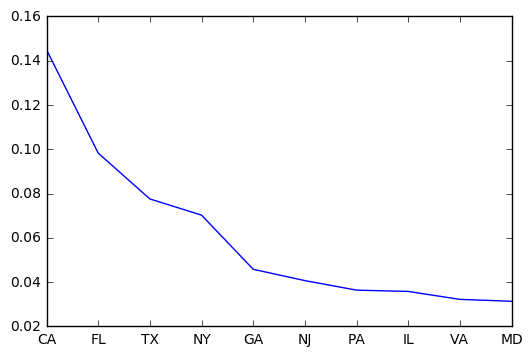

In [142]:
disp_no = (df['Consumer disputed?'] == 'No')
dispute_no = df[disp_no]
df6 = dispute_no['State'].value_counts(100).head(10)
df6.plot.line()

In [143]:
###
companies = {'Bank of America', 
             'Wells Fargo & Company', 
             'JPMorgan Chase & Co.', 
             'Equifax', 
             'Citibank'}
###
#dfbank = df.loc[df['Company'].isin(companies)]
dfdispute['dispute'] = dfbank['Consumer disputed?'].apply(lambda x: 1 if x=='Yes' else 0)

dfissue = dfbank[['Issue','dispute']].groupby(['Issue']).mean()

NameError: name 'dfbank' is not defined